In [3]:
import ee 
import geemap


In [4]:
ee.Authenticate()
ee.Initialize()
# 4/1AQlEd8xPLicUSUAUllTqKzsC3pUaCLB_J-xBKVkJTlDB-5GqDqpcVzrJOSg

In [5]:
# "USGS/SRTMGL1_003" is the Earth Engine asset ID for elevation data captured by the SRTM mission.
# ee.Image restrieves the image from tha specified Earth Engine asset ID

srtm = ee.Image('USGS/SRTMGL1_003')

srtm

Name,Description
elevation,Elevation


In [6]:
srtm.get("title").getInfo()

'NASA SRTM Digital Elevation 30m'

In [7]:
#he .projection() method provides information about the spatial characteristics of the image, including the CRS.
# .crs() retrieves ons crs info from the result of .projection()
srtm.projection().crs()

In [8]:
# We can use .projection().nominalScale to get information on the pixel size of an ee.Image object:
srtm.projection().nominalScale()

In [9]:
# retrieve metadata
metadata = srtm.getInfo()
metadata

{'type': 'Image',
 'bands': [{'id': 'elevation',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': -32768,
    'max': 32767},
   'dimensions': [1296001, 417601],
   'crs': 'EPSG:4326',
   'crs_transform': [0.0002777777777777778,
    0,
    -180.0001388888889,
    0,
    -0.0002777777777777778,
    60.00013888888889]}],
 'version': 1641990767055141,
 'id': 'USGS/SRTMGL1_003',
 'properties': {'system:visualization_0_min': '0.0',
  'type_name': 'Image',
  'keywords': ['dem',
   'elevation',
   'geophysical',
   'nasa',
   'srtm',
   'topography',
   'usgs'],
  'thumb': 'https://mw1.google.com/ges/dd/images/SRTM90_V4_thumb.png',
  'description': '<p>The Shuttle Radar Topography Mission (SRTM, see <a href="https://onlinelibrary.wiley.com/doi/10.1029/2005RG000183/full">Farr\net al. 2007</a>)\ndigital elevation data is an international research effort that\nobtained digital elevation models on a near-global scale. This\nSRTM V3 product (SRTM Plus) is provided by NASA JP

In [10]:
# visiualize the image
# Create a dictionary to define visualization settings
srtm_vis_param= {
    'min':0,    # Minimum elevation value
    'max':6000,    # Maximum elevation value
     # Color palette for visualization specified as hexadecimal color codes. , I chose these colour using https://colorbrewer2.org/
    'palette': ['#ffffe5','#fff7bc','#fee391','#fec44f','#fe9929','#ec7014','#cc4c02','#993404','#662506'], 
}

# Create a Map instance from geemap
srtm_vis = geemap.Map()

# Add the ee.Image srtm to the map and specify the visualization parameter
#  Set the layer name to "Elevation Data"
srtm_vis.addLayer(srtm, srtm_vis_param,  "Elevation Data")

# add LayerControl to the map
srtm_vis.addLayerControl()

# Display the map
srtm_vis

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [11]:
import geopandas as gpd

cantbury_bound = gpd.read_file("/home/ztang/canterbury_birds/GIS_file/canterbury_region.shp")

<Axes: >

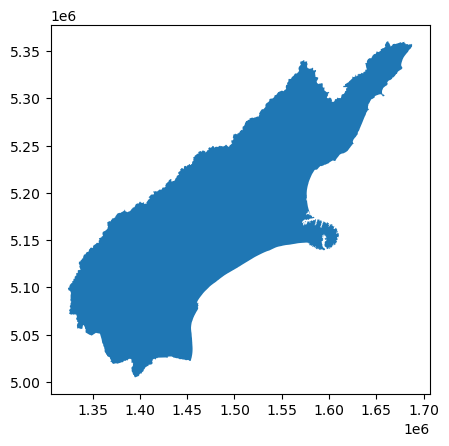

In [12]:
cantbury_bound.plot()

<Axes: >

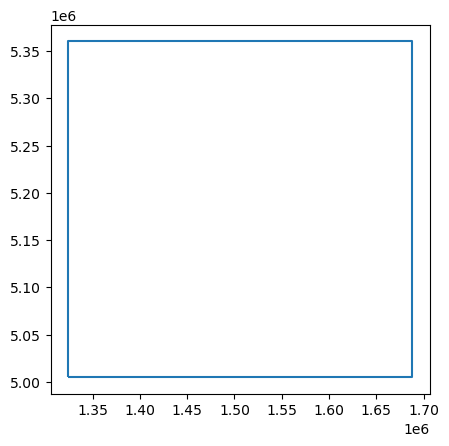

In [13]:
# The envelope of a geometry is the smallest bounding box that contains the geometry
# The boundary function is applied to the envelope to obtain the boundary geometry, 
# which is a LineString representing the outer boundary of the envelope.
cantbury_bound.envelope.boundary.plot()

In [14]:
# translate the bounding box into a ee.feature
import numpy as np
all_coords = [np.dstack(vertex.coords.xy).tolist()[0] for vertex in cantbury_bound.envelope.boundary.to_crs(epsg=4326)]

print(all_coords)

[[[169.4923089254114, -45.0566847785484], [174.12064163472965, -45.10508631494526], [174.06294452629842, -41.904866196417146], [169.67253083906704, -41.86155355582866], [169.4923089254114, -45.0566847785484]]]


In [15]:
# Flatten the list of coordinates to match the expected format for ee.Geometry.Polygon
#flattened_coords = [coord[0] for coord in all_coords]

# Create ee.Geometry feature using the extracted coordinates
# to define a region of interest (roi)
roi = ee.Geometry.Polygon(all_coords)


In [16]:
# Clip the image to the specified region
srtm_cant = srtm.clip(roi)

In [17]:
srtm_cant

Name,Description
elevation,Elevation


In [18]:
# Calculate the x-coordinate of the centroid
# Transform the bounding box boundary to EPSG 4326 and access the x-coordinate of the centroid
cx = cantbury_bound.envelope.boundary.to_crs(4326).centroid.x[0]

# Calculate the y-coordinate of the centroid
# Transform the bounding box boundary to EPSG 4326 and access the y-coordinate of the centroid
cy = cantbury_bound.envelope.boundary.to_crs(4326).centroid.y[0]

In [19]:
# Create a dictionary to define visualization settings
srtm_vis_param = {
    'min': -5,    # Minimum elevation value
    'max': 905,   # Maximum elevation value
    'opacity': 0.5,  # Opacity of the visualization (0.0 to 1.0)
    # Color palette for visualization specified as hexadecimal color codes.
    # I chose these colors using https://colorbrewer2.org/
    'palette': ['#ffffe5', '#fff7bc', '#fee391', '#fec44f', '#fe9929', '#ec7014', '#cc4c02', '#993404', '#662506'],
}


# Create a Map instance from geemap with specified center and zoom level
# Set the center of the map to the centroid coordinates
srtm_vis = geemap.Map(center=[cy, cx], zoom=10)

# Load an ee.Image (srtm_chc) and add it to the map with the specified visualization parameters
# Set the layer name to "Elevation Data"
srtm_vis.addLayer(srtm_cant, srtm_vis_param, "Elevation Data")

# Add LayerControl widget to the map for managing layers
srtm_vis.addLayerControl()

# Extract color palette, minimum, and maximum values from the visualization parameter
colors = srtm_vis_param['palette']
vmin = srtm_vis_param['min']
vmax = srtm_vis_param['max']

# Add a colorbar to the map using Branca
srtm_vis.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name="Elevation Data")

# Display the interactive map
srtm_vis

Map(center=[-43.50672119507731, 171.83671132741463], controls=(WidgetControl(options=['position', 'transparent…

### Calculating slope and aspect
We can also use ee.Terrain to derive slope and aspect from the srtm_chc DEM. Slope refers to the steepness of the terrain or how much the land surface deviates from being flat. It’s often expressed as a percentage, degree, or ratio. Slope can be calculated by measuring the vertical rise (elevation difference) between two points on the land surface and dividing it by the horizontal distance between those points. Steeper slopes indicate more rapid changes in elevation over a short distance, while gentler slopes represent gradual elevation changes. Aspect is the compass direction toward which a slope faces. It indicates the direction in which a slope is oriented. Aspect is typically measured in degrees from 0° (north) to 360°, moving clockwise. For example, a slope with an aspect of 90° (east) means that the slope faces the east direction. Aspect plays a significant role in understanding how sunlight, wind, and temperature patterns interact with the landscape. It affects factors like vegetation growth, snow accumulation and melt, and habitat distribution.

In [20]:
slope_cantbury=ee.Terrain.slope(srtm_cant)

In [21]:
# Create a dictionary to define visualization settings
slope_vis_param = {
    'min': 0,           # Minimum slope value
    'max': 90,          # Maximum slope value
    'opacity': 0.5,     # Opacity of the visualization (0.0 to 1.0)
    # Color palette for visualization specified as hexadecimal color codes.
    # I chose these colors using https://colorbrewer2.org/
    'palette': ['blue', 'red', 'red', 'red', 'red', 'red'],
}

# Create a Map instance from geemap with specified center and zoom level
# Set the center of the map to the centroid coordinates
slope_vis = geemap.Map(center=[cy, cx], zoom=10)

# Load an ee.Image (slope_chc) and add it to the map with the specified visualization parameters
# Set the layer name to "Slope in degrees"
slope_vis.addLayer(slope_cantbury, slope_vis_param, "Slope in degrees")

# Add LayerControl widget to the map for managing layers
slope_vis.addLayerControl()

# Extract color palette, minimum, and maximum values from the visualization parameter
colors = slope_vis_param['palette']
vmin = slope_vis_param['min']
vmax = slope_vis_param['max']

# Add a colorbar to the map using Branca
slope_vis.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name="Slope in degrees")

# Display the interactive map
slope_vis

Map(center=[-43.50672119507731, 171.83671132741463], controls=(WidgetControl(options=['position', 'transparent…

### calculate and visualize the aspect

In [22]:
# Calculate aspect. Units are degrees where 0=N, 90=E, 180=S, 270=W.
aspect_cantbury=ee.Terrain.aspect(srtm_cant)

In [23]:
# Create a dictionary to define visualization settings
aspect_vis_param = {
    'min': 0,           # Minimum aspect value (compass direction)
    'max': 360,         # Maximum aspect value (compass direction)
    'opacity': 0.5,     # Opacity of the visualization (0.0 to 1.0)
    # Color palette for visualization specified as color names.
    # These colors will be used to represent different aspect directions.
    'palette': ['red', 'green', 'blue', 'yellow'],
}

# Create a Map instance from geemap with specified center and zoom level
# Set the center of the map to the centroid coordinates
aspect_vis = geemap.Map(center=[cy, cx], zoom=10)

# Load an ee.Image (aspect_chc) and add it to the map with the specified visualization parameters
# Set the layer name to "Aspect in degrees"
aspect_vis.addLayer(aspect_cantbury, aspect_vis_param, "Aspect in degrees")

# Add LayerControl widget to the map for managing layers
aspect_vis.addLayerControl()

# Extract color palette, minimum, and maximum values from the visualization parameter
colors = aspect_vis_param['palette']
vmin = aspect_vis_param['min']
vmax = aspect_vis_param['max']

# Add a colorbar to the map using Branca
aspect_vis.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name="Aspect in degrees")

# Display the interactive map
aspect_vis

Map(center=[-43.50672119507731, 171.83671132741463], controls=(WidgetControl(options=['position', 'transparent…

#### downloading inmages to google drive


In [24]:
# Define the export parameters
# Specify the image to be exported (srtm_chc)
image = srtm_cant

# Description for the exported task. This will be the description shown ont the GEE Code Editor
description = 'export_dem_elevation'

# Folder in Google Drive where the exported data will be stored. If the folder does not exist, it will be created
folder = 'GEE lab'

# Scale of the exported image (in meters per pixel)
scale = 30

# Coordinate Reference System (CRS) for the exported image (e.g., EPSG:2193)
crs = 'EPSG:2193'

max_pixels = 1e9 # Maximum number of pixels to export
# Initialize an Earth Engine batch export task
# Create an export task using Export.image.toDrive
task = ee.batch.Export.image.toDrive(
    image=image,
    description=description,
    folder=folder,
    region=roi,
    scale=scale,
    crs=crs,
    maxPixels=max_pixels
)

# Start the export task
task.start()

# Sentinel 2 data

Sentinel-2 is a wide-swath, high-resolution, multi-spectral imaging mission supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas.

In [122]:
# Define start and end dates using ee.Date objects
start_date = ee.Date('2023-01-01')
end_date = ee.Date('2023-3-31')

# Create an ee.DateRange using the start and end dates
date_range = ee.DateRange(start_date, end_date)

# Define a geometry (point) using longitude and latitude coordinates
geom = ee.Geometry.Point(172.617, -43.531) 

# You can also define the area of interest using bounding box coordinates as [xmin, ymin, xmax, ymax]
# Uncomment the following line if you want to use a bounding box geometry instead
#geom = ee.Geometry.Rectangle([172.605, -43.540, 172.629, -43.522])

In [123]:
print(cx, cy)

172.617 -43.531


In [124]:
# Load and filter the image collection based on dates and location
s2_collection = ee.ImageCollection('MODIS/061/MOD11A1').filterBounds(geom).filterDate(date_range)

# Print the number of images in the filtered collection
collection_size = s2_collection.size()
print('Data type for s2_collection TEMP(3 MONTH): ', type(s2_collection))
print('Number of Images in Filtered Collection:', collection_size.getInfo())

Data type for s2_collection TEMP(3 MONTH):  <class 'ee.imagecollection.ImageCollection'>
Number of Images in Filtered Collection: 89


In [130]:
#import geemap
#import ee

# Initialize Earth Engine
#ee.Initialize()

# Define the region of interest (ROI)
#roi = ee.Geometry.Polygon([[[longitude1, latitude1], [longitude2, latitude2], 
#                            [longitude3, latitude3], [longitude4, latitude4]]])
geom = ee.Geometry.Point([172.617, -43.531]).buffer(200000)
# Set the date range for the 3 months
start_date = '2023-01-01'
end_date = '2023-03-31'

# Load the MODIS Land Surface Temperature/Emissivity Daily (MOD11A1) dataset
modis = ee.ImageCollection("MODIS/061/MOD11A1").select('LST_Day_1km')

# Apply filters: filter by date, region, and quality
filtered_collection = modis.filterDate(start_date, end_date)

# MODIS LST is in Kelvin scaled by a factor of 0.02, so we'll need to adjust for scaling
scaled_temperature = filtered_collection.map(lambda image: image.multiply(0.02))

# Calculate the mean temperature over the 3-month period
mean_temperature = scaled_temperature.mean().clip(geom)

# Convert from Kelvin to Celsius if needed
mean_temperature_celsius = mean_temperature.subtract(273.15)

# To visualize in geemap:
Map = geemap.Map()
Map.centerObject(geom, 10)

# Visualization parameters
vis_params = {
    'min': 10,    # Adjust these min/max temperature values based on your data
    'max': 45,
    'palette': ['blue', 'green', 'yellow', 'red']  # Adjust color palette
}
Map.addLayer(mean_temperature_celsius, vis_params, 'Mean Temperature (3 months)')
Map.addLayer(geom, {}, 'Region of Interest')
Map

# Optionally, export the results to Google Drive
# export_task = ee.batch.Export.image.toDrive(
#     image=mean_temperature_celsius,
#     description='MODIS_Mean_Temperature_3_Months',
#     scale=1000,  # 1 km spatial resolution
#     region=roi.getInfo()['coordinates'],
#     fileFormat='GeoTIFF'
# )
# export_task.start()


Map(center=[-43.53079495645819, 172.61700784289616], controls=(WidgetControl(options=['position', 'transparent…

In [137]:
mean_temperature_celsius

# view values of the image
#mean_temperature_celsius.getInfo()['precision']

In [ ]:
#Create a visualize the image composite in an interactive map:

# Create a Map instance from geemap with a specified center and zoom level
# The map will be centered at the coordinates [cy, cx] and zoomed to level 9
s2_vis = geemap.Map(center=[cy, cx], zoom=9)

# Load an ee.Image (s2_img) and add it to the map with the specified visualization parameters
# The layer will be named "Sentinel R(B4)G(B3)B(B2)"
s2_vis.addLayer(s2_img, vis_param, "LST_Day_1km")
# Add a LayerControl widget to the map for managing layers
s2_vis.addLayerControl()

# Display the interactive map with the added layers and controls
s2_vis

In [57]:
# Get the size of the Sentinel-2 image collection
count = s2_collection.size()

# Convert the collection to a list of images and iterate over them
# Print the image IDs
image_list = s2_collection.toList(count)
for i in range(count.getInfo()):
    # Get the current image from the list
    image = ee.Image(image_list.get(i))
    
    # Print the image ID
    print("Image ID:", image.id().getInfo())

Image ID: 2023_01_01
Image ID: 2023_01_02
Image ID: 2023_01_03
Image ID: 2023_01_04
Image ID: 2023_01_05
Image ID: 2023_01_06
Image ID: 2023_01_07
Image ID: 2023_01_08
Image ID: 2023_01_09
Image ID: 2023_01_10
Image ID: 2023_01_11
Image ID: 2023_01_12
Image ID: 2023_01_13
Image ID: 2023_01_14
Image ID: 2023_01_15
Image ID: 2023_01_16
Image ID: 2023_01_17
Image ID: 2023_01_18
Image ID: 2023_01_19
Image ID: 2023_01_20
Image ID: 2023_01_21
Image ID: 2023_01_22
Image ID: 2023_01_23
Image ID: 2023_01_24
Image ID: 2023_01_25
Image ID: 2023_01_26
Image ID: 2023_01_27
Image ID: 2023_01_28
Image ID: 2023_01_29
Image ID: 2023_01_30
Image ID: 2023_01_31
Image ID: 2023_02_01
Image ID: 2023_02_02
Image ID: 2023_02_03
Image ID: 2023_02_04
Image ID: 2023_02_05
Image ID: 2023_02_06
Image ID: 2023_02_07
Image ID: 2023_02_08
Image ID: 2023_02_09
Image ID: 2023_02_10
Image ID: 2023_02_11
Image ID: 2023_02_12
Image ID: 2023_02_13
Image ID: 2023_02_14
Image ID: 2023_02_15
Image ID: 2023_02_16
Image ID: 202

In [58]:
#mean_temperature = s2_collection.mean()

In [63]:
#mean_temperature

In [74]:
# Use `.get()` method to query the first image
# Convert the collection to a list of images and get the first image (index 0)
s2_img = ee.Image(s2_collection.toList(count).get(0)) 

# Alternatively, we also can select the first (i.e., earliest) image in the sorted collection
# Sort the collection by 'system:time_start' (acquisition time) in ascending order
# s2_sorted = s2_collection.sort('system:time_start')
# Get the first (earliest) image from the sorted collection
# s2_img = s2_sorted.first()

In [75]:
print(s2_img.getInfo().keys()) 

dict_keys(['type', 'bands', 'version', 'id', 'properties'])


In [105]:
# Use keys to get specific information
print(s2_img.getInfo()['bands']) # get bands information
print('\n')
#print('Cloud coverage is: ', s2_img.getInfo()['bands'][0].keys()) # get cloud cover 

[{'id': 'LST_Day_1km', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [43200, 21600], 'crs': 'SR-ORG:6974', 'crs_transform': [926.6254331383326, 0, -20015109.355797, 0, -926.6254331391667, 10007554.677903]}, {'id': 'QC_Day', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [43200, 21600], 'crs': 'SR-ORG:6974', 'crs_transform': [926.6254331383326, 0, -20015109.355797, 0, -926.6254331391667, 10007554.677903]}, {'id': 'Day_view_time', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [43200, 21600], 'crs': 'SR-ORG:6974', 'crs_transform': [926.6254331383326, 0, -20015109.355797, 0, -926.6254331391667, 10007554.677903]}, {'id': 'Day_view_angle', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [43200, 21600], 'crs': 'SR-ORG:6974', 'crs_transform': [926.6254331383326, 0, -20015109.355797, 0, -926.6254331391667, 10007554

In [77]:
geemap.ee_initialize()

s2_collection


In [106]:
s2_img = s2_img.divide(10000)

In [116]:
# Get the x and y coordinates from the geometry and convert them to Python variables
# These coordinates represent the longitude (x) and latitude (y) values of the point geometry
# we used to filter when searching the Image Collection

# Get the x-coordinate (longitude) from the geometry's coordinates and convert to Python variable
cx = geom.coordinates().get(0).getInfo()

# Get the y-coordinate (latitude) from the geometry's coordinates and convert to Python variable
cy = geom.coordinates().get(1).getInfo()

# Define visualization parameters for Sentinel-2 data
# These parameters specify which bands to use for visualization and the data range

# Define the bands for visualization as ['B4', 'B3', 'B2']
# These correspond to the red, green, and blue bands, respectively
# This combination creates a natural color image

# Set the minimum value for visualization to 0
# Set the maximum value for visualization to 1
# This range is used to visualize reflectance values in a normalized range
s2_vis_param = {
    'bands': ['LST_Day_1km'],
    'min': 7500,
    'max': 65535,
    'palette': [
        '040274', '040281', '0502a3', '0502b8', '0502ce', '0502e6',  # Cool blues
        '0602ff', '235cb1', '307ef3', '269db1', '30c8e2', '32d3ef',  # Gradation of blue to teal
        '3be285', '3ff38f', '86e26f', '3ae237', 'b5e22e', 'd6e21f',  # Greens to yellow-green
        'fff705', 'ffd611', 'ffb613', 'ff8b13', 'ff6e08', 'ff500d',  # Yellow to orange to red
        'ff0000', 'de0101', 'c21301', 'a71001', '911003'  # Red shades
    ],
}
